# Trying CNN for modeling here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report , confusion_matrix ,plot_confusion_matrix

import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping

%matplotlib inline

In [2]:
#feature_df = pd.read_csv('../Data/Data_and_Features.csv')

In [3]:
#using pickled df from previous file to preserve data and data types as CSV is modifying the data types 
feature_df=pd.read_pickle('Data_And_Features.pkl')

In [4]:
feature_df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Accent,...,853,854,855,856,857,858,859,860,861,Accent_num
0,19.0,9.0,"shady grove, maryland, usa",arabic38,arabic,female,1394,usa,False,American,...,-22.414141,-19.780674,-20.364351,-26.178616,-26.259825,-26.722843,-23.242558,-20.390944,-16.448463,1
1,32.0,12.0,"fort collins, colorado, usa",arabic45,arabic,female,1456,usa,False,American,...,-13.328942,-13.913136,-14.347802,-15.178201,-15.032391,-15.780533,-17.877295,-10.750269,-5.102596,1
2,19.0,3.0,"washington, district of columbia, usa",arabic78,arabic,female,1897,usa,False,American,...,-32.267937,-34.579670,-37.915585,-37.576115,-33.534348,-29.363533,-25.490492,-22.864353,-19.428410,1
3,43.0,40.0,"jianchuan, yunnan, china",bai1,bai,female,28,china,False,Chinese,...,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,-44.022732,2
4,34.0,3.5,"durgapur, west bengal, india",bengali11,bengali,male,1018,india,False,Indian,...,-4.014865,-4.399039,-7.001354,-11.521073,-10.343769,-8.018362,-7.545074,-10.307240,-11.671057,3


In [5]:
feature_df.shape

(791, 873)

In [6]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 873 entries, age to Accent_num
dtypes: bool(1), float64(864), int64(2), object(6)
memory usage: 5.3+ MB


In [7]:
features=range(0,784)

In [8]:
features

range(0, 784)

In [9]:
X=feature_df[features]
y=feature_df['Accent_num']

In [10]:
X=np.array(X)

In [11]:
X[0].shape

(784,)

In [12]:
X.shape

(791, 784)

In [13]:
y.value_counts()

1    433
2    221
3    137
Name: Accent_num, dtype: int64

In [14]:
type(X)

numpy.ndarray

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y )

In [16]:
X_train.shape

(553, 784)

In [17]:
X_train[0].shape

(784,)

In [18]:
#rows = X_train[0].shape[0]
#cols = X_train[0].shape[1]
#rows 

In [19]:
X_train=X_train.reshape(X_train.shape[0],28,28)

In [20]:
X_test=X_test.reshape(X_test.shape[0],28,28)

Train: X=(553, 28, 28), y=(553,)
Test: X=(238, 28, 28), y=(238,)


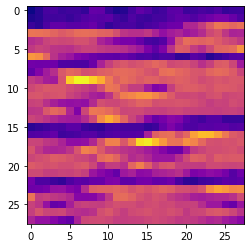

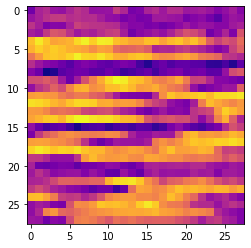

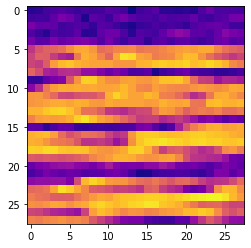

In [21]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images

for i in range(3):
    
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('plasma'))
# show the figure
    plt.show()

In [22]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [23]:
X_train[0]

array([[-0.1265163 , -0.11947132, -0.10949759, -0.10870349, -0.11381982,
        -0.11176246, -0.11156242, -0.11575475, -0.09902835, -0.09929239,
        -0.1153036 , -0.12246849, -0.1206795 , -0.11037698, -0.10038524,
        -0.10528675, -0.11411802, -0.1112444 , -0.10225241, -0.10201324,
        -0.11284667, -0.11187733, -0.1089025 , -0.11124761, -0.10675991,
        -0.11499482, -0.11272328, -0.11223192],
       [-0.12197392, -0.1194142 , -0.11107749, -0.11178077, -0.11137064,
        -0.11451935, -0.11046054, -0.10540321, -0.10234459, -0.10430402,
        -0.10197657, -0.11090949, -0.11467908, -0.10666274, -0.11190069,
        -0.11384599, -0.10980308, -0.11008009, -0.10429161, -0.09979478,
        -0.10151893, -0.10600594, -0.09944069, -0.09514348, -0.08960707,
        -0.09020317, -0.09760015, -0.10693713],
       [-0.11331835, -0.11816739, -0.10790652, -0.0994451 , -0.09972574,
        -0.10310192, -0.10222299, -0.10126359, -0.09747977, -0.10597859,
        -0.11594111, -0.1113

In [24]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [25]:
X_train.shape , X_test.shape

((553, 28, 28, 1), (238, 28, 28, 1))

In [26]:
X_train[0].shape

(28, 28, 1)

In [27]:
y_test_original=y_test

In [28]:
y_test_original

285    1
549    2
350    1
91     1
725    3
      ..
180    1
185    1
664    2
755    1
639    2
Name: Accent_num, Length: 238, dtype: int64

In [29]:
y_train.shape , y_test.shape

((553,), (238,))

In [30]:
y_train=np_utils.to_categorical(y_train,4)
y_test=np_utils.to_categorical(y_test,4)

In [31]:
y_train.shape , y_test.shape

((553, 4), (238, 4))

In [32]:
type(y_train)

numpy.ndarray

In [33]:
type(y_test)

numpy.ndarray

# CNN model for classification

In [34]:
cnn=Sequential()

In [35]:
cnn.add(Conv2D(filters = 4,
               kernel_size=(3,3),
               activation='relu',
               input_shape=(28,28,1)))

In [36]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
cnn.add(Flatten())

# Add a densely-connected layer with 128 neurons.
cnn.add(Dense(128,activation ='relu'))
cnn.add(Dense(64,activation ='relu'))


# Add output layer with 10 neurons.
cnn.add(Dense(4,activation='softmax'))

# compiler
cnn.compile(loss='categorical_crossentropy',
           optimizer = 'adam',
            metrics = ['accuracy']
           )

In [38]:
history = cnn.fit(X_train,
              y_train,
              batch_size=50,
              epochs=150,
              validation_data = (X_test, y_test),
              verbose=1)

Epoch 1/150
12/12 [==============================] - 0s 16ms/step - loss: 1.2919 - accuracy: 0.5118 - val_loss: 1.1278 - val_accuracy: 0.5462
Epoch 2/150
12/12 [==============================] - 0s 6ms/step - loss: 1.0753 - accuracy: 0.5479 - val_loss: 1.0223 - val_accuracy: 0.5462
Epoch 3/150
12/12 [==============================] - 0s 6ms/step - loss: 1.0126 - accuracy: 0.5479 - val_loss: 0.9958 - val_accuracy: 0.5462
Epoch 4/150
12/12 [==============================] - 0s 6ms/step - loss: 0.9929 - accuracy: 0.5479 - val_loss: 0.9851 - val_accuracy: 0.5462
Epoch 5/150
12/12 [==============================] - 0s 6ms/step - loss: 0.9839 - accuracy: 0.5479 - val_loss: 0.9772 - val_accuracy: 0.5462
Epoch 6/150
12/12 [==============================] - 0s 6ms/step - loss: 0.9752 - accuracy: 0.5479 - val_loss: 0.9824 - val_accuracy: 0.5504
Epoch 7/150
12/12 [==============================] - 0s 6ms/step - loss: 0.9981 - accuracy: 0.5136 - val_loss: 0.9757 - val_accuracy: 0.5462
Epoch 8/150


Epoch 59/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.7342 - val_loss: 0.8895 - val_accuracy: 0.6050
Epoch 60/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.6962 - val_loss: 0.9365 - val_accuracy: 0.5756
Epoch 61/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.7251 - val_loss: 0.8953 - val_accuracy: 0.6134
Epoch 62/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.7233 - val_loss: 0.9049 - val_accuracy: 0.6092
Epoch 63/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.7197 - val_loss: 0.8838 - val_accuracy: 0.6176
Epoch 64/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6294 - accuracy: 0.7486 - val_loss: 0.9036 - val_accuracy: 0.6050
Epoch 65/150
12/12 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.7342 - val_loss: 0.8941 - val_accuracy: 0.6261
Epoch 

# Train and Test Loss with CNN

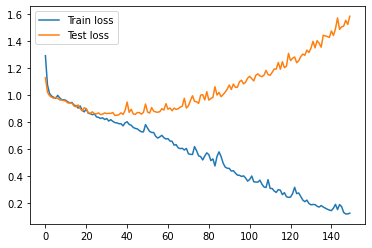

In [39]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

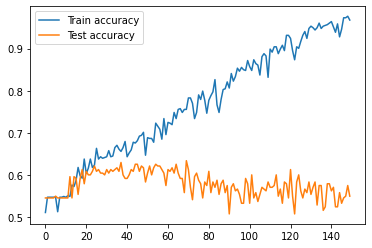

In [40]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [41]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

df = pd.DataFrame(list(zip(train_acc, test_acc, train_loss, test_loss)), 
               columns =['train_acc', 'test_acc', 'train_loss', 'test_loss']) 

df['accuracy_diff'] = df['train_acc'] - df['test_acc']
df['loss_diff'] = df['train_loss'] - df['test_loss']

df.tail()

,train_acc,test_acc,train_loss,test_loss,accuracy_diff,loss_diff
145,0.945750,0.533613,0.174222,1.506170,0.412137,-1.331948
146,0.972875,0.546219,0.131022,1.509732,0.426657,-1.378710
147,0.972875,0.550420,0.120167,1.553869,0.422455,-1.433701
148,0.976492,0.575630,0.120162,1.523503,0.400862,-1.403342
149,0.967450,0.550420,0.125499,1.583925,0.417030,-1.458426


In [42]:
y_pred=cnn.predict(X_test)



In [43]:
y_pred=np.argmax(y_pred,axis=1)

In [44]:
cnf=confusion_matrix(y_test_original, y_pred)

In [45]:
target_names=['American','Chinies','Indian']

print(classification_report(y_test_original, y_pred, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.73      0.61      0.66       130
     Chinies       0.49      0.60      0.54        67
      Indian       0.24      0.29      0.27        41

    accuracy                           0.55       238
   macro avg       0.49      0.50      0.49       238
weighted avg       0.58      0.55      0.56       238



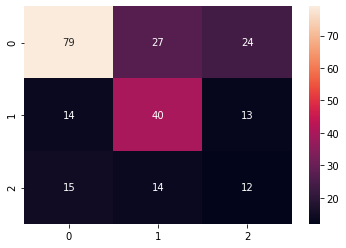

In [46]:
sns.heatmap(cnf,annot=True)

# Adding regularization to the CNN model

In [74]:
cnn2 = Sequential()

cnn2.add(Conv2D(filters = 6,            
                     kernel_size = (3, 3),       
                     activation='relu',     
                     input_shape=(28,28,1))) 


cnn2.add(MaxPooling2D(pool_size=(2,2))) 

cnn2.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation='relu'))

cnn2.add(MaxPooling2D(pool_size=(2,2)))

cnn2.add(Flatten())  

cnn2.add(Dense(128, activation='relu'))  

###Add dropout 

cnn2.add(Dropout(0.05))

cnn2.add(Dense(64, activation = 'relu'))

###add dropout
cnn2.add(Dropout(0.05))

cnn2.add(Dense(4, activation='softmax'))   

cnn2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [75]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0 , patience = 10)

In [76]:
history = cnn2.fit(X_train,
              y_train,
              batch_size=500,
              epochs=150,
              validation_data = (X_test, y_test),
             callbacks=[early_stop],
              verbose=1)

Epoch 1/150
2/2 [==============================] - 0s 66ms/step - loss: 1.3779 - accuracy: 0.3761 - val_loss: 1.3472 - val_accuracy: 0.5462
Epoch 2/150
2/2 [==============================] - 0s 17ms/step - loss: 1.3452 - accuracy: 0.5298 - val_loss: 1.3083 - val_accuracy: 0.5462
Epoch 3/150
2/2 [==============================] - 0s 16ms/step - loss: 1.3055 - accuracy: 0.5497 - val_loss: 1.2593 - val_accuracy: 0.5462
Epoch 4/150
2/2 [==============================] - 0s 17ms/step - loss: 1.2546 - accuracy: 0.5479 - val_loss: 1.2024 - val_accuracy: 0.5462
Epoch 5/150
2/2 [==============================] - 0s 17ms/step - loss: 1.1986 - accuracy: 0.5479 - val_loss: 1.1446 - val_accuracy: 0.5462
Epoch 6/150
2/2 [==============================] - 0s 16ms/step - loss: 1.1417 - accuracy: 0.5479 - val_loss: 1.0981 - val_accuracy: 0.5462
Epoch 7/150
2/2 [==============================] - 0s 18ms/step - loss: 1.0941 - accuracy: 0.5479 - val_loss: 1.0824 - val_accuracy: 0.5462
Epoch 8/150
2/2 [===

2/2 [==============================] - 0s 24ms/step - loss: 0.8859 - accuracy: 0.6257 - val_loss: 0.8710 - val_accuracy: 0.6050
Epoch 118/150
2/2 [==============================] - 0s 23ms/step - loss: 0.8831 - accuracy: 0.6148 - val_loss: 0.8838 - val_accuracy: 0.5882
Epoch 119/150
2/2 [==============================] - 0s 24ms/step - loss: 0.8930 - accuracy: 0.6094 - val_loss: 0.8682 - val_accuracy: 0.5966
Epoch 120/150
2/2 [==============================] - 0s 24ms/step - loss: 0.8837 - accuracy: 0.6094 - val_loss: 0.8659 - val_accuracy: 0.6176
Epoch 121/150
2/2 [==============================] - 0s 22ms/step - loss: 0.8788 - accuracy: 0.6365 - val_loss: 0.8662 - val_accuracy: 0.6134
Epoch 122/150
2/2 [==============================] - 0s 23ms/step - loss: 0.8774 - accuracy: 0.6347 - val_loss: 0.8633 - val_accuracy: 0.6134
Epoch 123/150
2/2 [==============================] - 0s 22ms/step - loss: 0.8701 - accuracy: 0.6293 - val_loss: 0.8634 - val_accuracy: 0.6176
Epoch 124/150
2/2 [=

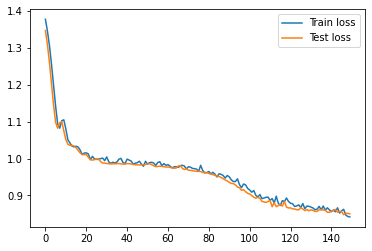

In [77]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

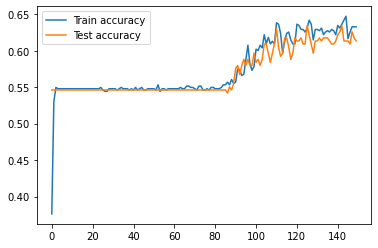

In [78]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [79]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']

df = pd.DataFrame(list(zip(train_acc, test_acc, train_loss, test_loss)), 
               columns =['train_acc', 'test_acc', 'train_loss', 'test_loss']) 

df['accuracy_diff'] = df['train_acc'] - df['test_acc']
df['loss_diff'] = df['train_loss'] - df['test_loss']

df.tail()

,train_acc,test_acc,train_loss,test_loss,accuracy_diff,loss_diff
145,0.616637,0.613445,0.858138,0.855914,0.003191,0.002224
146,0.625678,0.609244,0.862319,0.847737,0.016434,0.014581
147,0.632911,0.626050,0.847064,0.851884,0.006861,-0.004820
148,0.632911,0.617647,0.842975,0.851367,0.015264,-0.008392
149,0.632911,0.613445,0.841691,0.849929,0.019466,-0.008238


In [80]:
cnn2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               51328     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [81]:
y_pred2=cnn2.predict(X_test)

In [82]:
y_pred2=np.argmax(y_pred2,axis=1)

In [83]:
y_pred2

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [84]:
ls=list(zip(y_test_original,y_pred2))

In [85]:
ls1=[l for l in ls if l[0]==l[1]]
len(ls1)

146

In [86]:
cnf1=confusion_matrix(y_test_original, y_pred2)

In [87]:
target_names=['American','Chinies','Indian']

In [88]:
print(classification_report(y_test_original, y_pred2, 
 target_names=target_names))

              precision    recall  f1-score   support

    American       0.65      0.86      0.74       130
     Chinies       0.52      0.51      0.52        67
      Indian       0.00      0.00      0.00        41

    accuracy                           0.61       238
   macro avg       0.39      0.46      0.42       238
weighted avg       0.50      0.61      0.55       238



/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


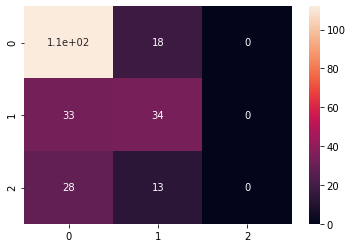

In [89]:
sns.heatmap(cnf1,annot=True)

In [92]:
# Trying Prediction with 1 file

new_X=feature_df.loc[4].iloc[10:794]

type(new_X)

new_X=np.array(new_X)



new_X.shape

#new_X=new_X.reshape(new_X.shape[0],28,28,1)

new_X=new_X.astype('float32')/255

new_X=new_X.reshape(1,28,28,1)

new_pred=np.argmax(cnn2.predict([new_X,]),axis=1)

new_pred[0]

2